In [1]:
DF_PATH = "../data/processed/1_preprocessed_df.pkl"
EXPORT_PATH = "../data/processed/Analytics_Processed_df.pkl"

In [2]:
#Load packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.model_selection import train_test_split , RandomizedSearchCV ,GridSearchCV, learning_curve
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn import linear_model
from sklearn.metrics import mean_squared_error 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix , accuracy_score , precision_score

## Read data and preprocess data

In [77]:
# Read Data 
df = pd.read_pickle(DF_PATH)
df

,Index,Country,City,Latitude,Longitude,Name,Breadwinner,Breadwinner Work,Male,Female,...,Over 18,House,Type of residence,Electricity,Water,Income,Need/food,Need/Clothes,Need/Education,Need/Money
0,5001,Iraq,Tall Afar,36.3760,42.4497,حسين قاسم,Father,Doesn't work,6,2,...,5,Flat,Own,Ambers,Public Network,146.0,1.0,NaN,NaN,0.0
1,4678,Iraq,Ar Rutbah,33.0385,40.2845,منير العليوي,Father,Doesn't work,3,1,...,2,Flat,Own,Solar Energy,Trucked water,40.0,1.0,1.0,NaN,1.0
2,5519,Syria,Idlib,35.9297,36.6317,بكري مصطفى,Father,Employed,6,3,...,5,Room,Guest,Public Network,Well,40.0,1.0,1.0,NaN,1.0
3,6001,Yemen,Al Ghaydah,16.2394,52.1638,عبدالجليل ابراهيم,Mother,House wife,2,8,...,6,Room,Rental,Private_generator,Trucked water,40.0,1.0,1.0,NaN,1.0
4,5335,Yemen,Al Ghaydah,16.2394,52.1638,محمدعمر ابوصالح,Father,Employed,2,3,...,2,Room,Guest,Public Network,River/Canal,94.0,1.0,1.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,5077,Libya,Sabha,27.0333,14.4333,خضر حربا,Father,Doesn't work,2,4,...,3,Flat,Rental,Battery,Lake/Pond,40.0,1.0,1.0,NaN,1.0
1697,6317,Iraq,Ar Rutbah,33.0385,40.2845,يعقوب سطم,Father,Doesn't work,4,2,...,3,Flat,Own,Public Network,Public Network,40.0,1.0,NaN,NaN,1.0
1698,5446,Yemen,Al Ghaydah,16.2394,52.1638,علي الصليبـي,Father,Retired,2,8,...,5,Flat,Rental,Public Network,Public Network,206.0,NaN,NaN,NaN,1.0
1699,5986,Libya,Al Jaghbub,29.7504,24.5166,حسن الابراهيم,Father,No need to work,2,3,...,2,Tent,Other,Private_generator,Well,40.0,1.0,NaN,NaN,1.0


## Dimensionality reduction 

In [78]:
df.drop(["Name","Under 5 Male",	"Latitude",	"Longitude","Under 5 Female","6-18 Male","6-18 Female","Over 18"], axis = 1, inplace = True)

In [79]:
df.drop(["Need/food","Need/Clothes","Need/Education","City"], axis = 1, inplace = True)

In [80]:
df = df.rename(columns={'Breadwinner':'BWinner','Breadwinner Work':'BWinnerW','Type of residence':'TypResidence','Other':'Tent'})

In [81]:
df.drop(["BWinner","House"], axis = 1, inplace = True)

In [82]:
# Create a new feature by merage Two features 
df['FamlyMembs']=df.apply (lambda x: (x["Male"]+ x["Female"]),axis=1)
df.drop(["Country",	"Male",	"Female","Electricity","Water"], axis = 1, inplace = True)

In [83]:
df.head(4)

,Index,BWinnerW,TypResidence,Income,Need/Money,FamlyMembs
0,5001,Doesn't work,Own,146.0,0.0,8
1,4678,Doesn't work,Own,40.0,1.0,4
2,5519,Employed,Guest,40.0,1.0,9
3,6001,House wife,Rental,40.0,1.0,10


In [84]:
# Creating  new features 
New_TyRe = pd.get_dummies(df.TypResidence)
New_TyRe.head()

,Guest,Other,Own,Rental
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,1,0,0,0


In [85]:
df = df.join(New_TyRe).drop('TypResidence', axis=1)

In [86]:
df.head(10)

,Index,BWinnerW,Income,Need/Money,FamlyMembs,Guest,Other,Own,Rental
0,5001,Doesn't work,146.0,0.0,8,0,0,1,0
1,4678,Doesn't work,40.0,1.0,4,0,0,1,0
2,5519,Employed,40.0,1.0,9,1,0,0,0
3,6001,House wife,40.0,1.0,10,0,0,0,1
4,5335,Employed,94.0,1.0,5,1,0,0,0
5,5088,Employed,89.0,1.0,8,1,0,0,0
6,6179,Employed,146.0,1.0,7,0,1,0,0
7,6008,Doesn't work,40.0,1.0,7,0,0,0,1
8,5244,Employed,40.0,1.0,9,0,0,0,1
9,5119,Employed,63.0,1.0,8,0,1,0,0


In [89]:
df = df.rename(columns={'Guest':'TR/Guest','Own':'TR/Own','Rental':'TR/Rental', 'Other':'TR/Camp'})

In [91]:
df.head()

,Index,BWinnerW,Income,Need/Money,FamlyMembs,TR/Guest,TR/Camp,TR/Own,TR/Rental
0,5001,Doesn't work,146.0,0.0,8,0,0,1,0
1,4678,Doesn't work,40.0,1.0,4,0,0,1,0
2,5519,Employed,40.0,1.0,9,1,0,0,0
3,6001,House wife,40.0,1.0,10,0,0,0,1
4,5335,Employed,94.0,1.0,5,1,0,0,0


In [92]:
# Encode BWinnerW Feature
Encod = LabelEncoder() 
df.BWinnerW= Encod.fit_transform(df.BWinnerW.values)

In [93]:
# Normalize Data type
df['Income'] = df['Income'].astype(int)

In [94]:
df['Need/Money'] = df['Need/Money'].astype(int)

In [95]:
df.drop(['Index'], axis = 1, inplace = True)
#ddf= df.insert(1,'Index','')

In [96]:
#re-constructing _Index 
df.index = np.arange(1, len(df) + 1)

In [97]:
#Create Data lables
kmeans = KMeans(n_clusters=2)
df["Cluster"] = kmeans.fit_predict(df)
df["Cluster"] = df["Cluster"].astype("category")
df

,BWinnerW,Income,Need/Money,FamlyMembs,TR/Guest,TR/Camp,TR/Own,TR/Rental,Cluster
1,0,146,0,8,0,0,1,0,0
2,0,40,1,4,0,0,1,0,1
3,1,40,1,9,1,0,0,0,1
4,2,40,1,10,0,0,0,1,1
5,1,94,1,5,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1697,0,40,1,6,0,0,0,1,1
1698,0,40,1,6,0,0,1,0,1
1699,4,206,1,10,0,0,0,1,0
1700,3,40,1,5,0,1,0,0,1


<AxesSubplot:xlabel='Cluster', ylabel='count'>

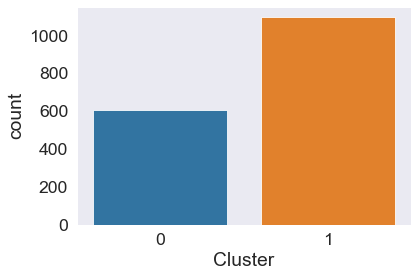

In [114]:
sns.countplot(data=df,x='Cluster')

In [99]:
df.sample(1).iloc[0]

BWinnerW        1
Income        130
Need/Money      0
FamlyMembs      6
TR/Guest        0
TR/Camp         0
TR/Own          1
TR/Rental       0
Cluster         0
Name: 270, dtype: int64

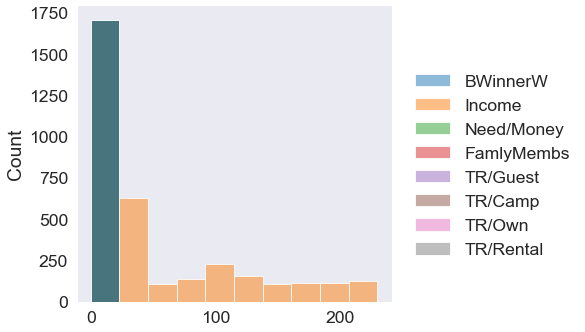

In [100]:
sns.set_style('dark')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df,  kind="hist", bins = 10, aspect = 1.2)

In [101]:
#test to select random sample 
df.sample(500).iloc[0]

BWinnerW       3
Income        94
Need/Money     1
FamlyMembs     8
TR/Guest       0
TR/Camp        1
TR/Own         0
TR/Rental      0
Cluster        1
Name: 633, dtype: int64

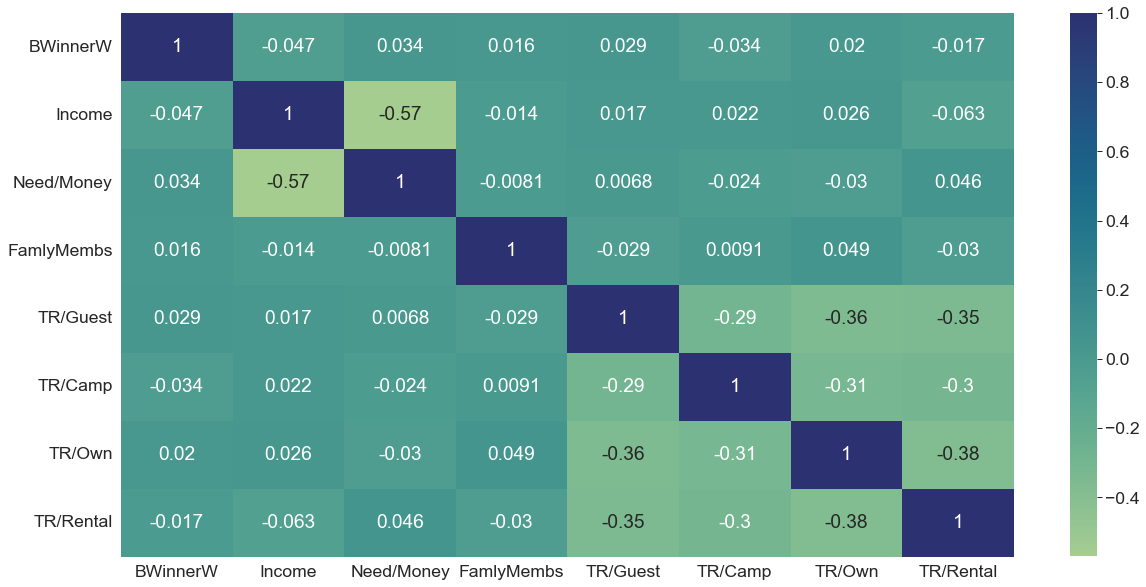

In [102]:
#HeatMap To see the relationship between features as whole
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(df.corr(), annot=True, cmap="crest");

In [103]:
df.to_pickle(EXPORT_PATH)

In [104]:
df

,BWinnerW,Income,Need/Money,FamlyMembs,TR/Guest,TR/Camp,TR/Own,TR/Rental,Cluster
1,0,146,0,8,0,0,1,0,0
2,0,40,1,4,0,0,1,0,1
3,1,40,1,9,1,0,0,0,1
4,2,40,1,10,0,0,0,1,1
5,1,94,1,5,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1697,0,40,1,6,0,0,0,1,1
1698,0,40,1,6,0,0,1,0,1
1699,4,206,1,10,0,0,0,1,0
1700,3,40,1,5,0,1,0,0,1


## Illustration Model

### Create train / test matrices

In [105]:
# Splite Data 
x = df.drop(['Cluster'], axis = 1)
y = df['Cluster'].values.ravel()

In [106]:
df.describe()

,BWinnerW,Income,Need/Money,FamlyMembs,TR/Guest,TR/Camp,TR/Own,TR/Rental
count,1701.000000,1701.000000,1701.000000,1701.000000,1701.000000,1701.000000,1701.000000,1701.000000
mean,1.764844,98.988242,0.776014,6.998824,0.252205,0.202234,0.279248,0.266314
std,1.655283,60.346956,0.417035,2.000000,0.434406,0.401784,0.448761,0.442160
min,0.000000,40.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,40.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,88.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,145.000000,1.000000,9.000000,1.000000,0.000000,1.000000,1.000000
max,5.000000,230.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000


In [107]:
# Check the total samples of cluster
cluster_df = df["Cluster"].copy()
cluster_df.describe()

count     1701
unique       2
top          1
freq      1096
Name: Cluster, dtype: int64

In [110]:
estimators = {  svm.SVC() : {'C':[0.1,0.2,0.3,0.4,0.5], 'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'] ,
                           'degree' : [3,4,5,6,7,8]},KNeighborsClassifier():{'n_neighbors': [2,4,5]}, 
               DecisionTreeClassifier():{'max_depth':[5,6,8,9], 'random_state':[40]}}

In [111]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)
X_train , X_test , y_train , y_test = train_test_split(X_scaled , y, test_size = 0.20 , shuffle = True)
for clf , hyper_params in estimators.items():
    rand =  GridSearchCV(clf , hyper_params, cv=10, scoring='accuracy')
    rand.fit(X_train, y_train)
    preds = rand.predict(X_test)
    print("{} acuracy = {} % , and precision score = {} % \n Best parameters are {} \n"
          .format(str(clf).replace('()',''),round(accuracy_score(y_test, preds) *100,4),
                  round(precision_score(y_test, preds)*100,4),rand.best_params_))

SVC acuracy = 96.7742 % , and precision score = 99.0521 % 
 Best parameters are {'C': 0.5, 'degree': 7, 'kernel': 'poly'} 

KNeighborsClassifier acuracy = 92.9619 % , and precision score = 97.0874 % 
 Best parameters are {'n_neighbors': 2} 

DecisionTreeClassifier acuracy = 100.0 % , and precision score = 100.0 % 
 Best parameters are {'max_depth': 5, 'random_state': 40} 

